In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

C:\Users\carso\Anaconda3\envs\tflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Download the IMDB dataset

In [2]:
imdb = keras.datasets.imdb
# num_words=10000 means, discard the words that are not amongst the 10000 most common
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Explore the data

## Shape of the data

In [3]:
print("Training entries:{}, labels: {}".format(
    train_data.shape, train_labels.shape
))

# Text of the reviews has been converted to integers where the integer represents a word in a dictionary
print("Training data review example:\n{}".format(
    train_data[0]
))

# The training data is a jagged matrix
print("Length of review 1: {}\nLength of review 2: {}".format(
    len(train_data[0]), len(train_data[1])
))

Training entries:(25000,), labels: (25000,)
Training data review example:
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345,

## Converting integers back to words

In [4]:
# words -> index
word_index = imdb.get_word_index()

# Map words to indices
word_index = {k: (v + 3) for k, v in word_index.items()}
len(word_index)
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 # unknown
word_index["UNUSED"] = 3

# Map indices to words
index_word = {v: k for k, v in word_index.items()}

def decode_review(text):
    return " ".join(index_word.get(w, "???") for w in text)

In [5]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

# Prepare the data

The reviews must be converted into tensors before being fed into the network


### Plan:
Pad the inputs so that each review example is the size of the max length review example and set this value (MAX) to be the input size for the input layer

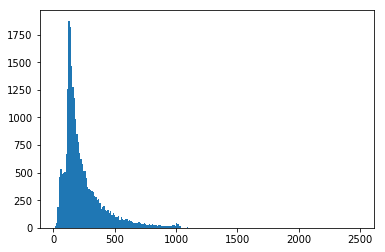

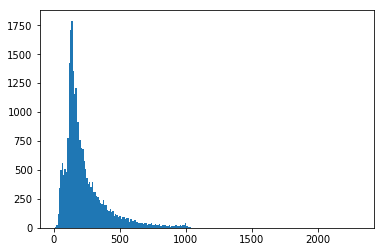

<Figure size 432x288 with 0 Axes>

In [6]:
# We see that almost all reviews are less than 500 words in length
lens_train = [len(r) for r in train_data]
plt.hist(lens_train, bins="auto")
plt.show()
plt.clf()

lens_test = [len(r) for r in test_data]
plt.hist(lens_test, bins="auto")
plt.show()
plt.clf()

In [15]:
# Use a power of 2 for simplicity
# MAX = 512
# 256 seems to get slightly better performance
MAX = 256

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding="post",
                                                        maxlen=MAX)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding="post",
                                                       maxlen=MAX)

In [8]:
i1 = np.random.randint(low=0, high=len(train_data))
i2 = np.random.randint(low=0, high=len(train_data))
print("Length of examples after padding:\nExample {}: {}, Example {}: {}".format(
    i1, len(train_data[i1]), i2, len(train_data[i1])
))

print("Training Review 0: {}".format(train_data[0]))
print("Training Review 0 (in words): {}".format(decode_review(train_data[0])))

Length of examples after padding:
Example 5326: 256, Example 100: 256
Training Review 0: [   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   2

# Build the model

In [9]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

# Still need to add the loss function and optimizer
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss="binary_crossentropy",
              metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


# Create a validation set

In [10]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

# Train the model

In [11]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=1
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/50
15000/15000 [==============================] - 1s 63us/step - loss: 0.7223 - acc: 0.4965 - val_loss: 0.6995 - val_acc: 0.5053
Epoch 2/50
15000/15000 [==============================] - 1s 46us/step - loss: 0.6966 - acc: 0.4965 - val_loss: 0.6924 - val_acc: 0.5053
Epoch 3/50
15000/15000 [==============================] - 1s 46us/step - loss: 0.6921 - acc: 0.5333 - val_loss: 0.6915 - val_acc: 0.5580
Epoch 4/50
15000/15000 [==============================] - 1s 45us/step - loss: 0.6910 - acc: 0.5644 - val_loss: 0.6908 - val_acc: 0.5493
Epoch 5/50
15000/15000 [==============================] - 1s 46us/step - loss: 0.6902 - acc: 0.5572 - val_loss: 0.6900 - val_acc: 0.5382
Epoch 6/50
15000/15000 [==============================] - 1s 45us/step - loss: 0.6881 - acc: 0.5522 - val_loss: 0.6873 - val_acc: 0.5643
Epoch 7/50
15000/15000 [==============================] - 1s 45us/step - loss: 0.6845 - acc: 0.5918 - val_loss: 0.6835 - val_acc

In [12]:
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 0s 11us/step
[0.30285026637077334, 0.87712]


# Visualize

In [13]:
h = history.history
print(h.keys())

dict_keys(['val_loss', 'acc', 'val_acc', 'loss'])


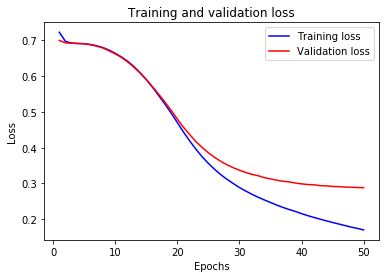

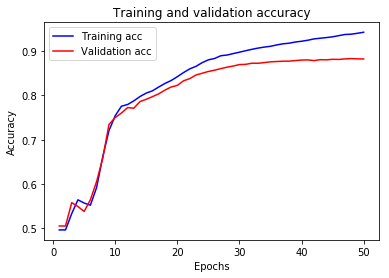

<Figure size 432x288 with 0 Axes>

In [14]:
epochs = range(1, len(h["acc"]) + 1)

plt.plot(epochs, h["loss"], "b", label="Training loss")
plt.plot(epochs, h["val_loss"], "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()

plt.plot(epochs, h["acc"], "b", label="Training acc")
plt.plot(epochs, h["val_acc"], "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.clf()